In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
# Import the data
train = pd.read_csv('train.csv')
Y = train['Survived']
train.drop(['PassengerId'],axis = 1 ,inplace = True)
test = pd.read_csv('test.csv')
test_id = test['PassengerId']

# Exploratory data analysis

### Numerical data

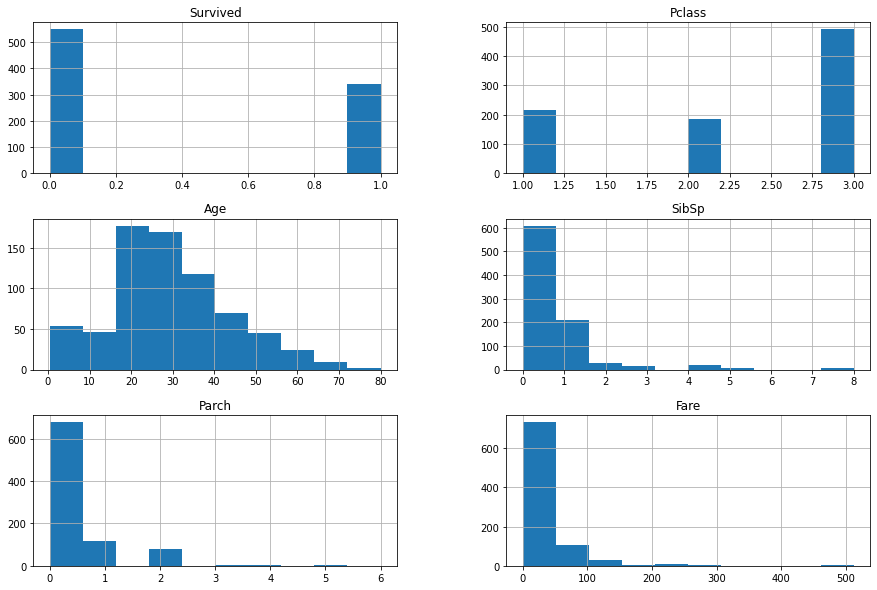

In [5]:
def plot_hist(df):
    df.hist(figsize = (15,10))
    plt.show()

    #df.boxplot(figsize = (20,15))
    #plt.show()
plot_hist(train)

Correlation and data description. I used matrix correlation method and a heat map so see the correlations in numerical data, but since Survived is a binary variable I also used point biserial correlation to confirm the data.

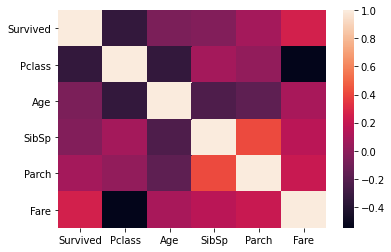

In [6]:
from scipy import stats

def correlation_describe(df):
    numerical = ['Pclass','Parch','Fare','Age']
    df['Age']=df['Age'].fillna(df['Age'].median())
    corr = {}
    for num in numerical:
        corr_values = stats.pointbiserialr(df['Survived'],df[num])
        corr[num] = corr_values
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix)
    desc = df.describe()
    return desc, corr , corr_matrix
desc,corr,corr_matrix = correlation_describe(train)



In [7]:
corr,corr_matrix

({'Pclass': PointbiserialrResult(correlation=-0.33848103596101514, pvalue=2.5370473879790813e-25),
  'Parch': PointbiserialrResult(correlation=0.08162940708348344, pvalue=0.014799245374712841),
  'Fare': PointbiserialrResult(correlation=0.2573065223849624, pvalue=6.120189341917992e-15),
  'Age': PointbiserialrResult(correlation=-0.06491041993052585, pvalue=0.05276068847579861)},
           Survived    Pclass       Age     SibSp     Parch      Fare
 Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
 Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
 Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
 SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
 Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
 Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000)

### Prepare data

Get the person's title from name. Mr, Mrs and Miss

In [8]:
def get_title(df): 
    df['title'] = df['Name'].str.split(',',expand = True)[1].str.split('.',expand = True)[0]
    mr_values =['Don','Rev','Dr','Major','Col','Capt','Jonkheer','Sir','Master']
    mrs_replace = ['Mme','Dona','the Countess','Mra','Lady']
    miss_replace = ['Ms','Mlle']
    df['title'] = df['title'].replace(mr_values,'Mr',regex = True)
    df['title'] = df['title'].replace(mrs_replace,'Mrs',regex = True)
    df['title'] = df['title'].replace(miss_replace,'Miss',regex = True)
    return df
train = get_title(train)
test = get_title(test)

In [9]:
train_copy = train.copy()
train_copy.drop(['Survived'],axis = 1,inplace = True)
train_copy.drop(['Name'],inplace = True,axis = 1)
train_copy['Ticket'].value_counts().head(50)

1601             7
347082           7
CA. 2343         7
CA 2144          6
3101295          6
347088           6
S.O.C. 14879     5
382652           5
LINE             4
PC 17757         4
17421            4
19950            4
349909           4
4133             4
2666             4
W./C. 6608       4
113781           4
113760           4
347077           4
347742           3
35273            3
29106            3
C.A. 31921       3
PC 17572         3
PC 17760         3
363291           3
F.C.C. 13529     3
371110           3
230080           3
345773           3
PC 17755         3
110152           3
24160            3
PC 17582         3
C.A. 34651       3
13502            3
248727           3
110413           3
239853           3
SC/Paris 2123    3
364516           2
2691             2
349237           2
11668            2
113505           2
376564           2
358585           2
PC 17569         2
PC 17558         2
250644           2
Name: Ticket, dtype: int64

In [156]:
train_copy.loc[train_copy['Ticket'] == 'W./C. 6608']

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
86,3,male,16.0,1,3,W./C. 6608,34.375,NaN,S,Mr
147,3,female,9.0,2,2,W./C. 6608,34.375,NaN,S,Miss
436,3,female,21.0,2,2,W./C. 6608,34.375,NaN,S,Miss
736,3,female,48.0,1,3,W./C. 6608,34.375,NaN,S,Mrs


# Create a test set


 Mr      266
 Miss     79
 Mrs      73
Name: title, dtype: int64

In [35]:


def fill_nan(df):    
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].isna().astype(int)
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Embarked'] = df['Embarked'].replace({'S':1,'C':2,'Q':3}).fillna(1)   
    return df


In [79]:
def ticket(df):
    df['Ticket'] = df['Ticket'].str.split(' ',expand = True)[0]
    df['Ticket'] = df['Ticket'].astype('category').cat.codes
    return df

In [83]:
def family_members(df):
    df['Family Size'] = df['Parch'] + df['SibSp']
    df['withFamily'] = df['Family Size'].where(df['Family Size'] < 1,1)
    return df

In [84]:
def getDummies(df):
    dummies_sex = pd.get_dummies(df['Sex'])
    dummies_embarked = pd.get_dummies(df['Embarked'])
    dummies_title = pd.get_dummies(df['title'])
    dummies_Pclass = pd.get_dummies(df['Pclass'])
    df = pd.concat([dummies_embarked,dummies_sex, dummies_title,dummies_Pclass],axis = 1)
    #df = pd.concat([dummies_sex, dummies_title,dummies_Pclass],axis = 1)
    return df

In [85]:
def preProcess(df):
    data = fill_nan(df)
    data = get_title(data)
    data = ticket(data)
    data = family_members(data)
    dummies = getDummies(data)
    final_df = pd.concat([data,dummies],axis= 1)
    final_df.drop(['Name','Sex','Pclass','Embarked','title','PassengerId'],inplace = True,axis = 1)
    #final_df.drop(['Name','Sex','Pclass','title'],inplace = True,axis = 1)
    return final_df

In [86]:
train_data  = preProcess(train)
test_data = preProcess(test)

In [87]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

In [88]:
X_train, X_test, y_train,y_test = train_test_split(train_data, Y,random_state = 0,test_size = 0.10)

In [53]:
def gradient_boost_model(X_train,y_train,X_test,y_test):
    gbc = GradientBoostingClassifier(learning_rate=0.1,subsample = 1,max_features = 7,n_estimators =300).fit(X_train,y_train)
    train_score = gbc.score(X_train,y_train)
    prediction = gbc.predict(X_test)
    test_score = accuracy_score(y_test,prediction)
    cross_val_scores = cross_val_score(gbc,X_train,y_train, cv = 5)
    print(train_score)
    print(test_score)
    print(cross_val_scores)
    return gbc
gradient_boost_model(X_train,y_train,X_test,y_test)

#{'learning_rate': 0.1, 'max_features': 7, 'n_estimators': 300, 'subsample': 1}

0.9450686641697877
0.8555555555555555
[0.81987578 0.825      0.8625     0.8375     0.84375   ]


GradientBoostingClassifier(max_features=7, n_estimators=300, subsample=1)

In [54]:
def random_forest_model(X_train,y_train, X_test,y_test):
    rf = RandomForestClassifier(n_estimators= 500,max_features=6,max_depth=10).fit(X_train,y_train)
    train_score = rf.score(X_train,y_train)
    prediction =rf.predict(X_test)
    test_score = accuracy_score(y_test,prediction)
    cross_val_scores = cross_val_score(rf,X_train,y_train, cv = 5)
    print(train_score)
    print(test_score)
    print(cross_val_scores)
    return rf
random_forest_model(X_train,y_train,X_test,y_test)
#{'max_depth': 10, 'max_features': 4, 'n_estimators': 500}


0.9538077403245943
0.8555555555555555
[0.83229814 0.8375     0.85       0.8125     0.85      ]


RandomForestClassifier(max_depth=10, max_features=6, n_estimators=500)

In [55]:
def ada_boost_model(X_train,y_train,X_test,y_test):
    ada = AdaBoostClassifier(n_estimators = 50,learning_rate = 1.5).fit(X_train,y_train)
    train_score = ada.score(X_train,y_train)
    prediction = ada.predict(X_test)
    test_score = accuracy_score(y_test,prediction)
    cross_val_scores = cross_val_score(ada, X_train,y_train,cv = 5)
    print(train_score)
    print(test_score)
    print(cross_val_scores)
    return ada
ada_boost_model(X_train,y_train,X_test,y_test)
#{'learning_rate': 1.5, 'n_estimators': 50}

0.8626716604244694
0.8666666666666667
[0.8447205 0.79375   0.8625    0.81875   0.85     ]


AdaBoostClassifier(learning_rate=1.5)

In [56]:
param_grid = {'learning_rate':[0.001,0.01,0.05,0.08,0.1],'subsample': [0.3,0.5,0.8,1],'n_estimators':[300,500,800,1500],'max_features':[6,7,8,9,10]}
model = GradientBoostingClassifier()
def grid_searchCV_gbc(param_grid,model,X_train,y_train,X_test,y_test):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    prediction = gs.predict(X_test)
    train_score = gs.score(X_train,y_train)
    test_score = accuracy_score(y_test,prediction)
    best_params = gs.best_params_
    print(train_score)
    print(test_score)
    print(best_params)
grid_searchCV_gbc(param_grid,model,X_train,y_train,X_test,y_test)


KeyboardInterrupt: 

In [16]:
param_grid = {'n_estimators':[100,300,500,800,1500],'max_features':[1,4,6,7,8,9,10],'max_depth' : [None,1, 3, 5 ,7,10,12]}
model = RandomForestClassifier()
def grid_searchCV_rf(param_grid,model,X_train,y_train,X_test,y_test):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    prediction = gs.predict(X_test)
    train_score = gs.score(X_train,y_train)
    test_score = accuracy_score(y_test,prediction)
    best_params = gs.best_params_
    print(train_score)
    print(test_score)
    print(best_params)
grid_searchCV_rf(param_grid,model,X_train,y_train,X_test,y_test)

0.947565543071161
0.8555555555555555
{'max_depth': 10, 'max_features': 4, 'n_estimators': 500}


In [30]:
param_grid = {'learning_rate':[0.05,0.1,0.5,0.8,1,1.5,1.8,2],'n_estimators':[10,20,35,45,50,55,60,70]}
model = AdaBoostClassifier()
def grid_searchCV_ada(param_grid,model,X_train,y_train,X_test,y_test):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    prediction = gs.predict(X_test)
    train_score = gs.score(X_train,y_train)
    test_score = accuracy_score(y_test,prediction)
    best_params = gs.best_params_ 
    print(train_score)
    print(test_score)
    print(best_params)
grid_searchCV_ada(param_grid,model,X_train,y_train,X_test,y_test)

0.8626716604244694
0.8666666666666667
{'learning_rate': 1.5, 'n_estimators': 50}


In [31]:
## MODEL IN TEST DATA

In [93]:
def final_models(X,Y,X_test,id):
    gbc = GradientBoostingClassifier(learning_rate=0.1,subsample = 1,max_features = 7,n_estimators =300)
    rf =  RandomForestClassifier(n_estimators= 500,max_features=6,max_depth=10)
    ada = AdaBoostClassifier(n_estimators = 50,learning_rate = 1.5)
    models = [gbc,rf,ada]
    for model in models:
        model.fit(X,Y)
        pred = model.predict(X_test)
        submission = pd.DataFrame({'PassengerID': id, 'Survived': pred})
        submission.to_csv('submission{}.csv'.format(model),index=False)

    
    
    
    
    ##gbc = GradientBoostingClassifier(learning_rate=0.1,subsample = 1,max_features = 7,n_estimators =300).fit(X,Y)
    #gbc_prediction = gbc.predict(X_test)
    #rf = rRandomForestClassifier(n_estimators= 500,max_features=6,max_depth=10).fit(X,Y)
    #rf_prediction = rf.predict(X_test)
    #ada = AdaBoostClassifier(n_estimators = 50,learning_rate = 1.5).fit(X,Y)
    #ada_predict = ada.predict(X_test)


    #gbc_submission = pd.DataFrame({'PassengerId' : id,'Survived': gbc_prediction})
    #gbc_submission.to_csv('gbc_submission.csv',index = False)
    return 


In [94]:
final_models(train_data,Y,test_data,id)